In [1]:
import sys
sys.path.insert(0, "../")

from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

In [2]:
## This is the folder that holds recent observations by wfc3 on HST in a SNAP program

inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'
configFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/config/'

name = "u03396"

In [3]:
inFolder = inFolder + '/'
configFolder   = configFolder + '/'

outFolder = "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"


if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [4]:
df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

X0 = float(df.loc['X0'].value)
Y0 = float(df.loc['Y0'].value)

Config = {} 

Config["name"] = name
Config["inFolder"] = inFolder
Config["objRoot"] = objRoot
Config["configFolder"] = configFolder
Config["X0"] = X0
Config["Y0"] = Y0

In [5]:
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(model=0, mask=1, 
                                       smooth=2, minArea=20, thresh=3,
                                       r_aperture = 150,   # [pixel] ignore objects within the aperture
                                       renuc=1, **Config) 

catal_df.head()

Outputs_u03396/u03396_bb6d9894f133/obj.000.pro


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,THETA_IMAGE,...,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAG_ISO,MAGERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,rc
0,1,563.327,31.080,92.572971,79.915734,-12.5142,0.0060,2.469,2.013,-66.0,...,0.0028,0.0,-16540560347052900352.0000,0.0,0.0,-12.4759,0.0054,-12.5443,0.0087,532.154003
1,2,488.593,11.693,92.585231,79.917673,-10.3168,0.0578,2.248,0.987,60.6,...,0.0700,0.0,-16540560347052900352.0000,0.0,0.0,-9.0666,0.0530,-10.0664,0.0912,556.573293
2,3,387.016,5.482,92.598710,79.920694,-11.0165,0.0165,2.339,1.303,-74.6,...,0.0124,0.0,-16540560347052900352.0000,0.0,0.0,-10.9408,0.0137,-11.0799,0.0259,584.937656
3,4,10.997,5.020,92.645103,79.932303,-10.7635,0.0141,1.090,1.085,20.3,...,0.0093,0.0,-16540560347052900352.0000,0.0,0.0,-10.7738,0.0104,-10.8222,0.0158,785.242719
4,5,992.930,998.885,92.366675,79.920886,-12.4280,0.0101,3.265,2.409,5.3,...,0.0063,0.0,-16540560347052900352.0000,0.0,0.0,-12.2563,0.0069,-12.3641,0.0124,611.883345


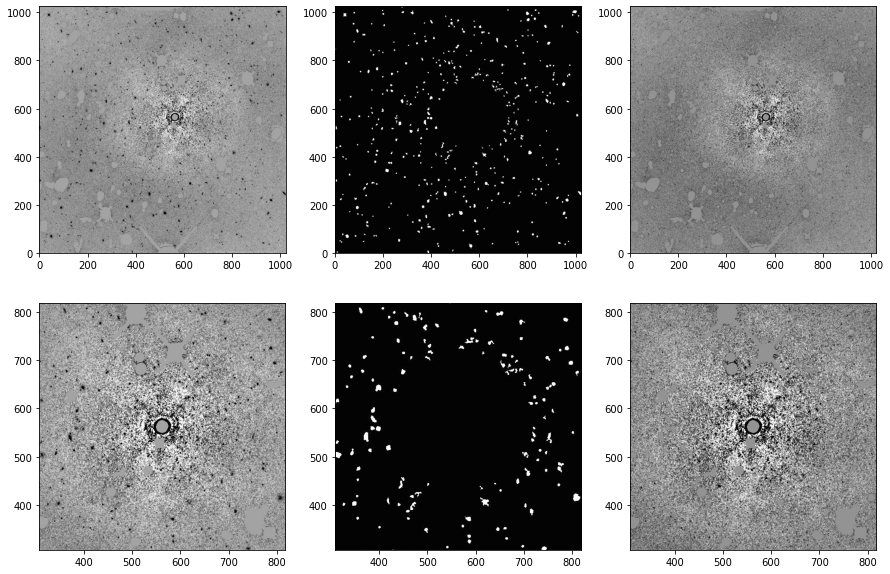

In [9]:
fig, AX = plt.subplots(2,3, figsize=(15,10))


tv(residual, ax=AX[0][0])
tv(sex_objname, ax=AX[0][1])
tv(sex_masked, ax=AX[0][2], options='')

zoom = 4
tv(residual, ax=AX[1][0], XY=[X0,Y0], zoom=zoom)
tv(sex_objname, ax=AX[1][1], XY=[X0,Y0], zoom=zoom)
tv(sex_masked, ax=AX[1][2], XY=[X0,Y0], zoom=zoom)



In [7]:
unnamed(catal_df, **Config)

wrote:  Outputs_u03396/u03396_bb6d9894f133/u03396_se.lknj
GCs:  0
galaxies:  387
